<a href="https://colab.research.google.com/github/yvrjsharma/Keras-edition-deux/blob/main/Keras_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Regression using Deep Learning with Keras

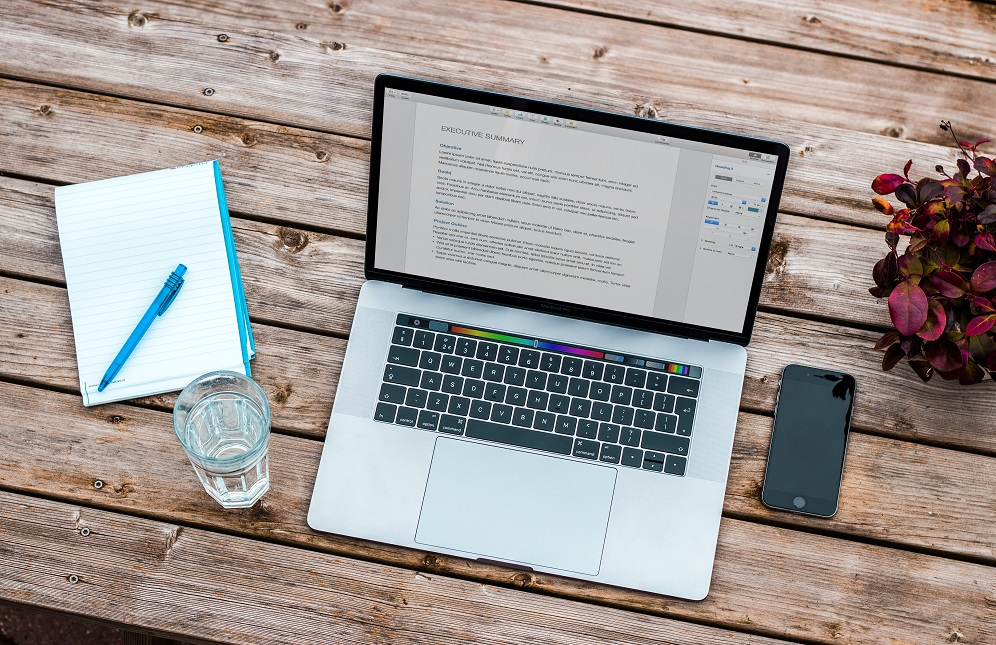

Photo by <a href="https://unsplash.com/@bramnaus?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Bram Naus</a> on <a href="https://unsplash.com/collections/8548062/blog-header?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

Implementing end-to-end ML workflows - Data preprpocessing, basic model building, and model evaluation.

## Classification 

* IMDB movies review dataset
* Task : Classify each review as negative or positive movie review

IMDB dataset has 50k movie reviews, and it comes packaged with Keras. It is divided in training and validation sets with 25k reviews each. Both sets havve 50% s negative and positive reviews by design. The dataset comes preprocess, thus the reviews are already represented as set of numbers and we dont have to worry about transforming words into numbers. Also note that we are keeping only *top* 10000 words by occurrency counts.

You can get the words back from the set of numbers representing them, by using the dictionary representing words mapping to integer indexes. It is also shown in below code.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
#Getting original words back
word_index =  imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

### Preparing the data
* The input text rows should all be equal in length and should all be represented as integers. We need to convert our input into tensors.
* Two ways of ddoing this - *Pad* all input lists to have the same length. Start the model with a layer capable of handling the integer tensors.
* Another way would be to multi-hot encode the words. So if there are 10000 unique words that would mean every word would be represented as a very sparse 10000 dimensional vector with all the values as 0s except the word itself as 1.3

In [5]:
#multi hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  #creating matrix of shape total samples x dimension 
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
#display a smaple
print(x_train.shape, x_train[0])

#Vectorizing the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#sample a label
print(len(y_train), y_train)

(25000, 10000) [0. 1. 1. ... 0. 0. 0.]
25000 [1. 0. 0. ... 0. 1. 0.]


### Building the model

We will solve this classification problem of IMDB reviews, in which input is expressed as sparse vectors and targets as a scalar using densely connected neural network. We need to decide how many layers to use and how many units/*neurons* to put in each layer. We can start with 3 layers, with first two layers with 16 units, while the last would have one unit to output the sentiment.

We will be using BinaryCrossEntropy as the los function as we have probabilities as outputs and it is a binary classification problem we are delaing with. For optimizer we will use RMSprop whih is a good solid first choice in most of the problems.


In [21]:
#Keras implementation of such neural network
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          #Sigmoid to output a probability value between 0 and 1
                          layers.Dense(1, activation="sigmoid")
                        ])

model.compile(optimizer="RMSprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validation set 
Setting apart 10000 reviews as validation set. We will not be training on this set, however will be evaluatinng the trained model.

In [23]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

### Training

Training the model for 20 epochs over entire new training set. Lets set a mini-batch size of 512 reviews. 

In [25]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 40ms/step - loss: 0.5297 - accuracy: 0.7892 - val_loss: 0.3983 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3220 - accuracy: 0.8984 - val_loss: 0.3255 - val_accuracy: 0.8730
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2350 - accuracy: 0.9235 - val_loss: 0.2830 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1846 - accuracy: 0.9389 - val_loss: 0.2761 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1508 - accuracy: 0.9513 - val_loss: 0.2782 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1266 - accuracy: 0.9588 - val_loss: 0.2884 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1040 - accuracy: 0.9687 - val_loss: 0.3066 - val_accuracy: 0.8832
Epoch 8/20
30

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

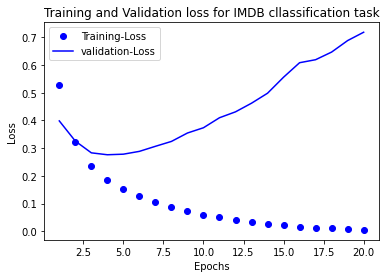

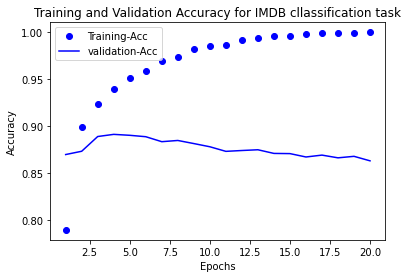

In [30]:
#plotting the loss for train and val set
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training-Loss")
plt.plot(epochs, val_loss_values, "b", label="validation-Loss")
plt.title("Training and Validation loss for IMDB cllassification task")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plotting accuracy for train and val set as well
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, "bo", label="Training-Acc")
plt.plot(epochs, val_acc_values, "b", label="validation-Acc")
plt.title("Training and Validation Accuracy for IMDB cllassification task")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Overfitting
It seems by looking at the graphs that Validation los was decreasing uptill around 4 epochs and then the model started over-optimizing on the training data and learns features that are specific to train data and don't generalize to data outside the traiining set.

Lets train till 4 epochs only this time and lets train on entire s_train and y_train and test on x_test and y_test -


In [33]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          #Sigmoid to output a probability value between 0 and 1
                          layers.Dense(1, activation="sigmoid")
                        ])

model.compile(optimizer="RMSprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

#Results are test_loss, and test_accuracy
results

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4690 - accuracy: 0.8219
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2703 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2066 - accuracy: 0.9270
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2997 - accuracy: 0.8818


[0.2996905744075775, 0.8817999958992004]

In [34]:
#Checing out model predictions on test data
#This will produce an array of predicted probabilities for every review 
model.predict(x_test)


array([[0.2240514 ],
       [0.9997911 ],
       [0.9131592 ],
       ...,
       [0.16975327],
       [0.10772933],
       [0.7767013 ]], dtype=float32)